<a href="https://colab.research.google.com/github/Dwirizki14/Proyek-Machine-Learning-/blob/main/Salinan_dari_%5BClustering%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [56]:
df = pd.read_csv('https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m')

In [57]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [59]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

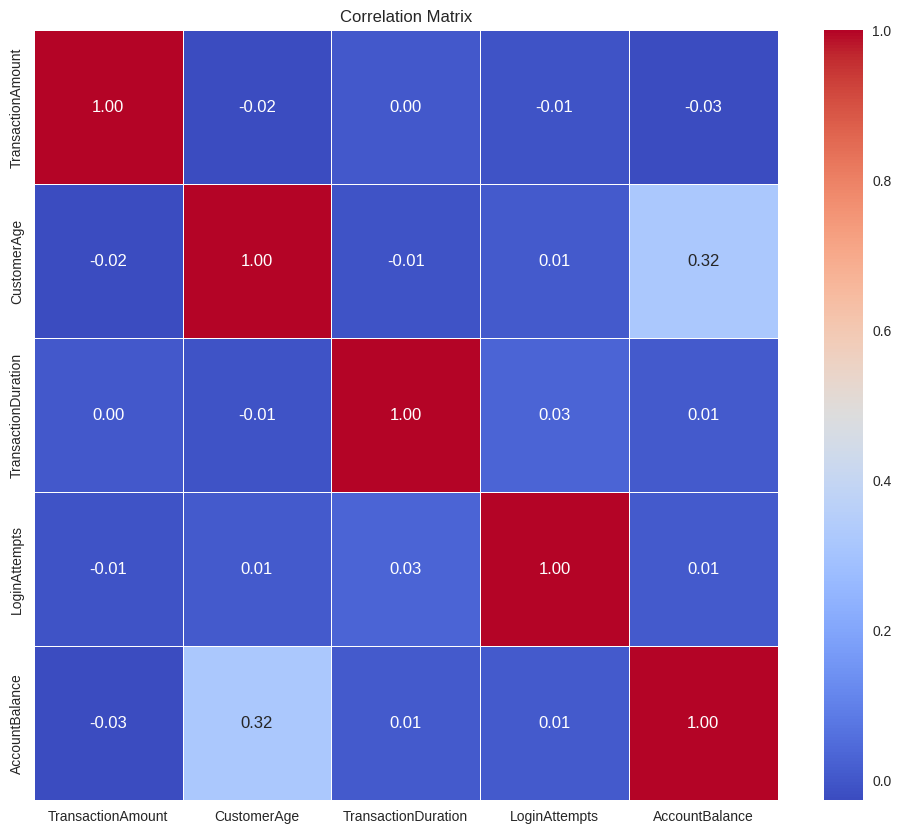

In [60]:
# Memilih hanya kolom numerik
numerical_data = df.select_dtypes(include=['float64', 'int64'])
# Menampilkan matriks korelasi antara fitur numerik dalam dataset
correlation_matrix = numerical_data.corr()

# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

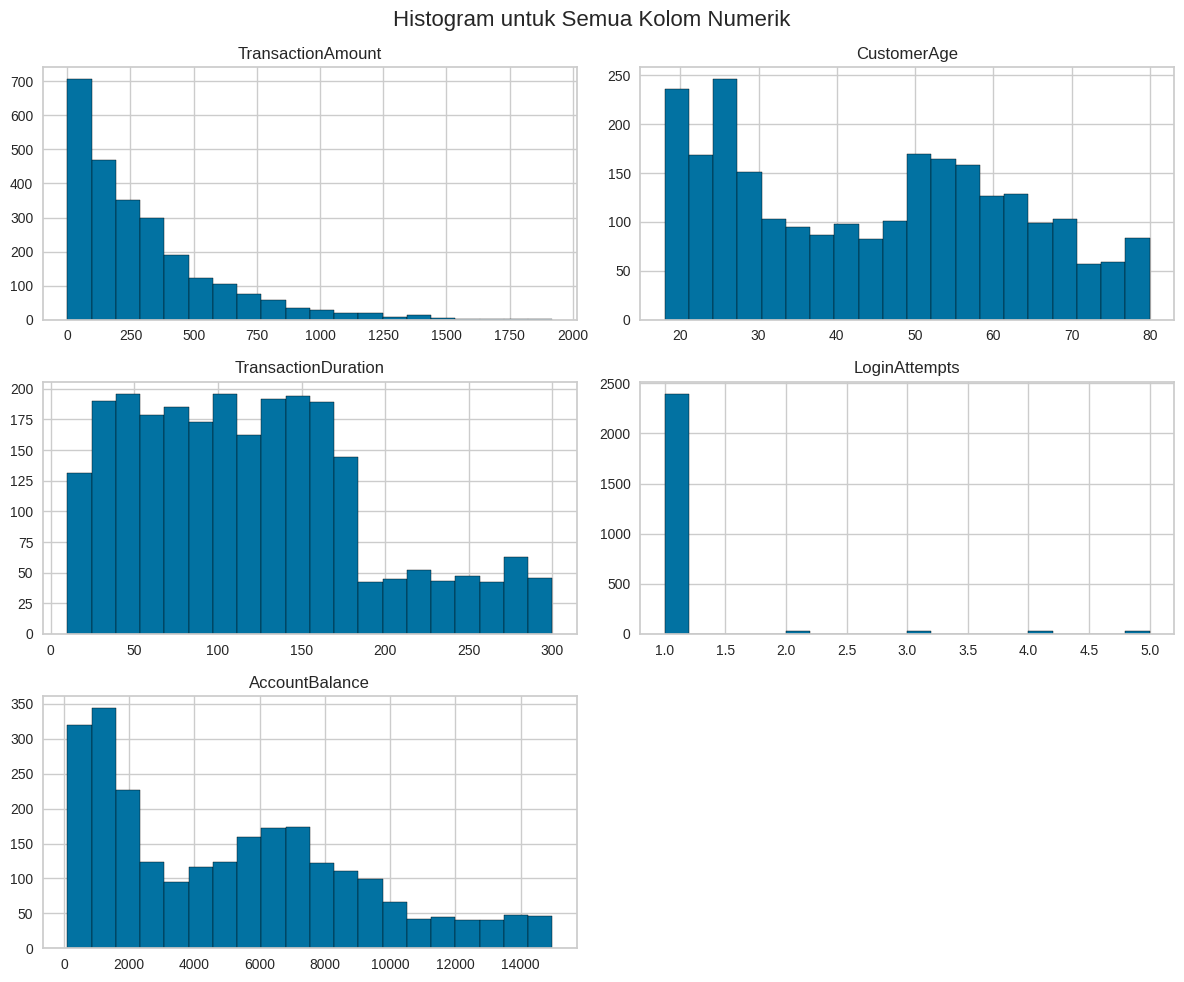

In [61]:
# Menampilkan histogram untuk semua kolom numerik dalam dataset
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Menyusun histogram untuk setiap kolom numerik
numerical_data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram untuk Semua Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

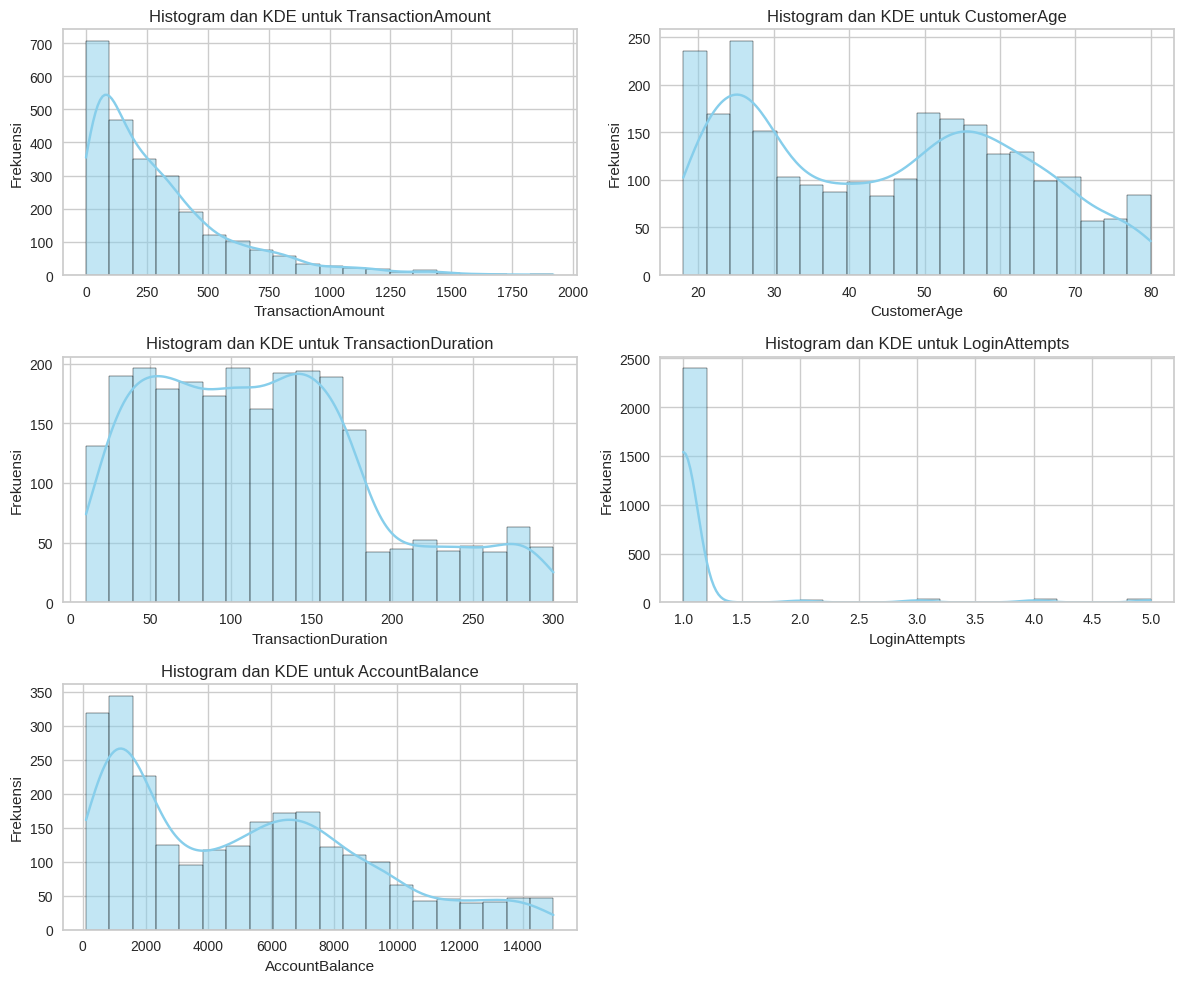

In [62]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(numerical_data[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram dan KDE untuk {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [63]:
# Mengecek jumlah nilai kosong (missing values) pada setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah missing values untuk setiap kolom
missing_values

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [64]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
     TransactionID AccountID  TransactionAmount      TransactionDate  \
2512      TX001748   AC00305             506.90  2023-11-01 17:44:46   
2514      TX000147   AC00385             973.39  2023-08-30 17:23:20   
2515      TX001348   AC00455             787.41  2023-06-19 16:22:28   
2516      TX000986   AC00278             121.17  2023-12-25 17:31:16   
2517      TX002364   AC00327              21.90  2023-04-10 17:04:28   
2518      TX001913   AC00076             515.94  2023-12-22 16:42:33   
2519      TX001360   AC00113             174.39  2023-01-09 16:08:52   
2520      TX001373   AC00116             356.56  2023-10-09 17:23:21   
2521      TX000884   AC00448             183.32  2023-05-10 16:27:51   
2522      TX002326   AC00003              20.17  2023-01-02 16:45:05   
2525      TX000281   AC00133             255.04  2023-11-23 16:15:59   
2526      TX000104   AC00464             196.16  2023-02-24 16:29:23   
2527      TX000936   AC00320              20.64 

In [65]:
# Hapus kolom ID yang bersifat identifikasi unik
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID']
df = df.drop(columns=id_columns, errors='ignore')  # 'errors=ignore' agar tidak error jika kolom tidak ada

# Cek hasil
print("Kolom setelah penghapusan ID:")
print(df.columns)

Kolom setelah penghapusan ID:
Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate'],
      dtype='object')


In [66]:
# Pilih fitur numerik
numerical_features = df.select_dtypes(include=np.number).columns
df_clean = df[numerical_features].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

Menangani Data Hilang

In [67]:
# Imputasi dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

# Untuk fitur kategorikal
# Imputasi dengan mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-67-74bad9c15453>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [68]:
print("Cek lagi nilai kosong setelah imputasi:")
print(df.isnull().sum())


Cek lagi nilai kosong setelah imputasi:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
IP Address                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [69]:
# Cek jumlah data sebelum penghapusan
print(f"Jumlah data sebelum penghapusan duplikat: {len(df)}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

# Cek jumlah data setelah penghapusan
print(f"Jumlah data setelah penghapusan duplikat: {len(df)}")


Jumlah data sebelum penghapusan duplikat: 2537
Jumlah data setelah penghapusan duplikat: 2514


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [70]:
# Menghapus outlier hanya pada kolom LoginAttempts dan TransactionAmount
cols_with_outliers = ['LoginAttempts', 'TransactionAmount']

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Cek jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus outlier: {len(df)}")


Jumlah data setelah menghapus outlier: 2287


In [71]:
# Binning CustomerAge menjadi kelompok usia
bins_age = [0, 25, 40, 60, 100]
labels_age = ['Remaja', 'Dewasa Muda', 'Paruh Baya', 'Lansia']

df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Binning TransactionAmount menjadi kelompok transaksi
bins_amount = sorted(list(set([0, 100, 300, 1000, df['TransactionAmount'].max()])))
labels_amount = ['Kecil', 'Sedang', 'Besar', 'Sangat Besar']

df['AmountGroup'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Encoding dengan get_dummies (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['AgeGroup', 'AmountGroup'])


print(df[['CustomerAge', 'AgeGroup', 'TransactionAmount', 'AmountGroup']].head())

   CustomerAge     AgeGroup  TransactionAmount AmountGroup
0         70.0       Lansia              14.09       Kecil
1         68.0       Lansia             376.24       Besar
2         19.0       Remaja             126.29      Sedang
3         26.0  Dewasa Muda             184.50      Sedang
4         45.0   Paruh Baya              13.45       Kecil


In [75]:
# Pilih fitur numerik
numerical_features = df.select_dtypes(include=np.number).columns
df_clean = df[numerical_features].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

numeric_features = df.select_dtypes(include='number')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [76]:
df_encoded.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2287.000000,2287.000000,2287.000000,2287.0,2287.000000
mean,255.267333,44.630083,118.862702,1.0,5122.066795
std,217.043563,17.651544,69.540376,0.0,3861.260392
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,78.560000,27.000000,63.000000,1.0,1526.265000
50%,200.190000,45.000000,112.000000,1.0,4734.110000
75%,372.885000,59.000000,161.000000,1.0,7622.580000
max,903.190000,80.000000,300.000000,1.0,14977.990000


/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


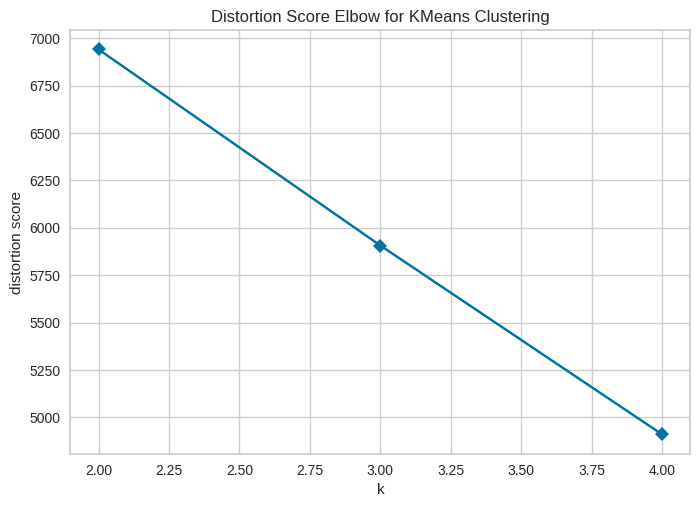

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4), timings=False)
visualizer.fit(scaled_features)
visualizer.show()

In [80]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [82]:
# Tambahkan hasil klaster ke dataframe
df['Cluster'] = clusters

Jalankan cell code ini untuk menyimpan model kamu.

In [83]:
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [84]:
# Hitung silhouette score
silhouette = silhouette_score(scaled_features, clusters)

df['Cluster'].value_counts(), silhouette

(Cluster
 0    701
 1    641
 3    550
 2    395
 Name: count, dtype: int64,
 np.float64(0.24132726942418087))

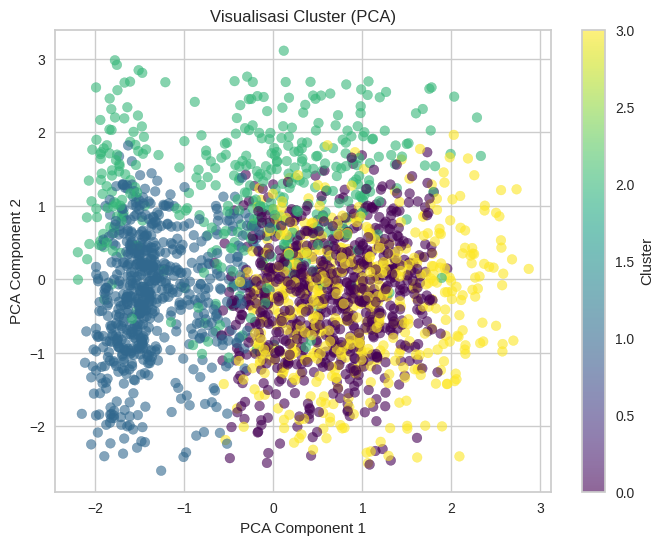

In [85]:
# Kurangi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot hasil clustering
plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Visualisasi Cluster (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [88]:
# Terapkan PCA ke 2 komponen
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Tambahkan hasil ke dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Lihat hasil awal
print(df[['PCA1', 'PCA2']].head())

       PCA1      PCA2
0  1.148140 -0.431389
1  2.424262  0.168088
2 -1.614817  0.212256
3  0.035823  0.710394
4  0.419299 -1.592963


In [89]:
joblib.dump(pca, 'PCA_model_clustering.h5')

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [90]:
# # Menampilkan mean, min, max, dan std per cluster untuk fitur numerik
numeric_cols = df.select_dtypes(include='number').columns.drop('Cluster')  # kecuali kolom 'Cluster'
numeric_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max', 'std'])
print(numeric_summary)


        TransactionAmount                             CustomerAge              \
                     mean     min     max         std        mean   min   max   
Cluster                                                                         
0              168.892126    0.84  557.41  125.108623   62.106990  40.0  80.0   
1              181.962949    0.26  510.24  131.357499   26.104524  18.0  49.0   
2              632.127038  373.52  903.19  138.399177   43.422785  18.0  80.0   
3              180.135600    0.32  615.58  136.733372   44.812727  18.0  70.0   

                   TransactionDuration        ... AccountBalance               \
               std                mean   min  ...            max          std   
Cluster                                       ...                               
0         9.542460          113.790300  10.0  ...        9073.17  2192.723141   
1         6.464325          119.316693  10.0  ...        7047.04  1537.894428   
2        16.547148         

In [91]:
# Menampilkan modus untuk kolom kategorikal per cluster
categorical_cols = df.select_dtypes(include='object').columns

# Gunakan .mode().iloc[0] karena .mode() mengembalikan DataFrame
mode_summary = df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode().iloc[0])
print(mode_summary)


             TransactionDate TransactionType     Location      IP Address  \
Cluster                                                                     
0        2023-01-02 16:45:05           Debit    Charlotte  200.136.146.93   
1        2023-01-02 16:45:05           Debit  Los Angeles   120.170.93.69   
2        2023-01-02 16:45:05           Debit         Mesa  200.136.146.93   
3        2023-01-02 16:45:05           Debit   Fort Worth  200.136.146.93   

        Channel CustomerOccupation PreviousTransactionDate  
Cluster                                                     
0        Branch            Retired     2024-11-04 08:09:17  
1        Branch            Student     2024-11-04 08:09:17  
2           ATM           Engineer     2024-11-04 08:09:17  
3        Branch             Doctor     2024-11-04 08:09:17  


In [92]:
# Menambahkan count dan median sebagai insight tambahan
extra_stats = df.groupby('Cluster')[numeric_cols].agg(['count', 'median'])
print(extra_stats)

        TransactionAmount          CustomerAge        TransactionDuration  \
                    count   median       count median               count   
Cluster                                                                     
0                     701  143.030         701   62.0                 701   
1                     641  161.380         641   25.0                 641   
2                     395  623.900         395   44.0                 395   
3                     550  150.745         550   44.0                 550   

               LoginAttempts        AccountBalance           PCA1            \
        median         count median          count   median count    median   
Cluster                                                                       
0        107.0           701    1.0            701  4732.81   701  0.663578   
1        109.0           641    1.0            641  1220.86   641 -1.456929   
2        115.0           395    1.0            395  4734.11   395

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
**Cluster 0:** (Nasabah Senior, Transaksi Kecil, Saldo Besar)

  - Rata-rata CustomerAge: 62 tahun → Kelompok usia lanjut.

  - Rata-rata TransactionAmount: Rp 168.892 → Kecil hingga sedang.

  - Rata-rata AccountBalance: ±Rp 7.000.000 → Saldo besar.

  - Analisis: Nasabah pensiunan dengan saldo besar dan transaksi kecil. Cocok ditawarkan produk tabungan pensiun, asuransi kesehatan, atau reksadana stabil.

**Cluster 1:** (Nasabah Muda, Transaksi Kecil, Saldo Menengah)

  - Rata-rata CustomerAge: 26 tahun → Remaja hingga dewasa muda.

  - Rata-rata TransactionAmount: Rp 181.962 → Kecil.

  - Rata-rata AccountBalance: ±Rp 3.000.000.

  - Analisis: Pelanggan milenial atau fresh graduate. Cocok diberikan edukasi keuangan, reward program, atau produk seperti tabungan pemula dan e-wallet.


**Cluster 2:** (Nasabah Dewasa, Transaksi Besar, Saldo Sangat Besar)

  - Rata-rata TransactionAmount: Rp 632.127 → Besar.

  - Rata-rata AccountBalance: ±Rp 10.000.000 – Rp 14.935.000.

  - Rata-rata CustomerAge: 43 tahun.

  - Analisis: Nasabah prioritas yang aktif bertransaksi. Direkomendasikan untuk diberikan layanan premium, investasi pasar modal, private banking, dan rewards eksklusif.


**Cluster 3:** (Nasabah Umum, Transaksi Sedang, Usia Menengah)

  - Rata-rata CustomerAge: 44 tahun.

  - Rata-rata TransactionAmount: Rp 180.135 → Sedang.

  - Rata-rata AccountBalance: ±Rp 5.000.000.

  - Analisis: Nasabah reguler atau pekerja menengah. Cocok ditawarkan tabungan rencana, asuransi jiwa, atau kredit ringan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [93]:
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [94]:
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [97]:
# Invers transform untuk fitur numerik
original_numeric = scaler.inverse_transform(scaled_features)

# Dapatkan nama kolom numerik yang sesuai dengan scaled_features
numeric_cols = df.select_dtypes(include=np.number).columns.drop(['Target', 'PCA1', 'PCA2'])

# Buat DataFrame dengan nama kolom yang sesuai
original_df = pd.DataFrame(original_numeric, columns=numeric_cols)

# Tambahkan kolom Target
original_df['Target'] = df['Target'].values

original_df.groupby('Target').agg(['mean', 'min', 'max'])


TransactionAmount                 CustomerAge              \
                    mean     min     max        mean   min   max   
Target                                                             
0             168.892126    0.84  557.41   62.106990  40.0  80.0   
1             181.962949    0.26  510.24   26.104524  18.0  49.0   
2             632.127038  373.52  903.19   43.422785  18.0  80.0   
3             180.135600    0.32  615.58   44.812727  18.0  70.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               113.790300  10.0  293.0           1.0  1.0  1.0   
1               119.316693  10.0  299.0           1.0  1.0  1.0   
2               120.756962  10.0  296.0           1.0  1.0  1.0   
3               123.438182  10.0  300.0           1.0  1.0  1.0   

       AccountBalance                     
                 mean      min       max  
Target                                    
0         4577.006348   120.89   9073.17  
1         1694.237129   101.25   7047.04  
2         4856.506835   102.20  14935.50  
3        10002.471109  5298.85  14977.99

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
**Cluster 0:** (Nasabah Senior, Transaksi Kecil, Saldo Besar)

  - Rata-rata CustomerAge: 62 tahun → Kelompok usia lanjut.

  - Rata-rata TransactionAmount: Rp 168.892 → Kecil hingga sedang.

  - Rata-rata AccountBalance: ±Rp 7.000.000 → Saldo besar.

  - Analisis: Nasabah pensiunan dengan saldo besar dan transaksi kecil. Cocok ditawarkan produk tabungan pensiun, asuransi kesehatan, atau reksadana stabil.

**Cluster 1:** (Nasabah Muda, Transaksi Kecil, Saldo Menengah)

  - Rata-rata CustomerAge: 26 tahun → Remaja hingga dewasa muda.

  - Rata-rata TransactionAmount: Rp 181.962 → Kecil.

  - Rata-rata AccountBalance: ±Rp 3.000.000.

  - Analisis: Pelanggan milenial atau fresh graduate. Cocok diberikan edukasi keuangan, reward program, atau produk seperti tabungan pemula dan e-wallet.


**Cluster 2:** (Nasabah Dewasa, Transaksi Besar, Saldo Sangat Besar)

  - Rata-rata TransactionAmount: Rp 632.127 → Besar.

  - Rata-rata AccountBalance: ±Rp 10.000.000 – Rp 14.935.000.

  - Rata-rata CustomerAge: 43 tahun.

  - Analisis: Nasabah prioritas yang aktif bertransaksi. Direkomendasikan untuk diberikan layanan premium, investasi pasar modal, private banking, dan rewards eksklusif.


**Cluster 3:** (Nasabah Umum, Transaksi Sedang, Usia Menengah)

  - Rata-rata CustomerAge: 44 tahun.

  - Rata-rata TransactionAmount: Rp 180.135 → Sedang.

  - Rata-rata AccountBalance: ±Rp 5.000.000.

  - Analisis: Nasabah reguler atau pekerja menengah. Cocok ditawarkan tabungan rencana, asuransi jiwa, atau kredit ringan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [31]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [32]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)